In [1]:
import FHMM
import cPickle as pk
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline
from DataStore import DataStore
from Preprocessing import Appliance, train_test_split, create_matrix

/Users/nelly/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
with open('../data/predictions.pkl') as f:
    predictions = pk.load(f)

with open('../data/test2.pkl') as f:
    test = pk.load(f)
    
with open('../data/Trained_model.pkl') as f:
    fhmm = pk.load(f)

In [3]:
DStore = DataStore('ngalvbucket1', 'house_1')
all_channels = [12, 5, 3, 6]
select_channels = [12, 5, 3, 6]
# select_channels = [12, 5, 6]

DStore.create_store(all_channels)

time_line = DStore.create_combined_df('2013-10-01 00:00:00', '2013-12-31 23:59:59', select_channels = select_channels, freq='1Min')


Creating data frame for channel_12
Done
Creating data frame for channel_5
Done
Creating data frame for channel_3
Done
Creating data frame for channel_6
Done


In [4]:
test_oct, test_nov, test_dec = train_test_split(time_line,'2013-10-31 23:59:59','2013-11-30 23:59:59')
test_oct.head()

,channel_6,channel_3,channel_5,channel_12,total
date,,,,,
2013-10-01 00:00:00,1.0,0.0,0.0,2.1,3.1
2013-10-01 00:01:00,1.0,0.0,0.0,0.0,1.0
2013-10-01 00:02:00,1.0,0.0,0.0,0.0,1.0
2013-10-01 00:03:00,1.0,0.0,0.0,0.0,1.0
2013-10-01 00:04:00,1.0,0.0,0.0,0.0,1.0


In [8]:
Min15_pred = predictions.resample('15Min').mean()
Min15_test = test.resample('15Min').mean()

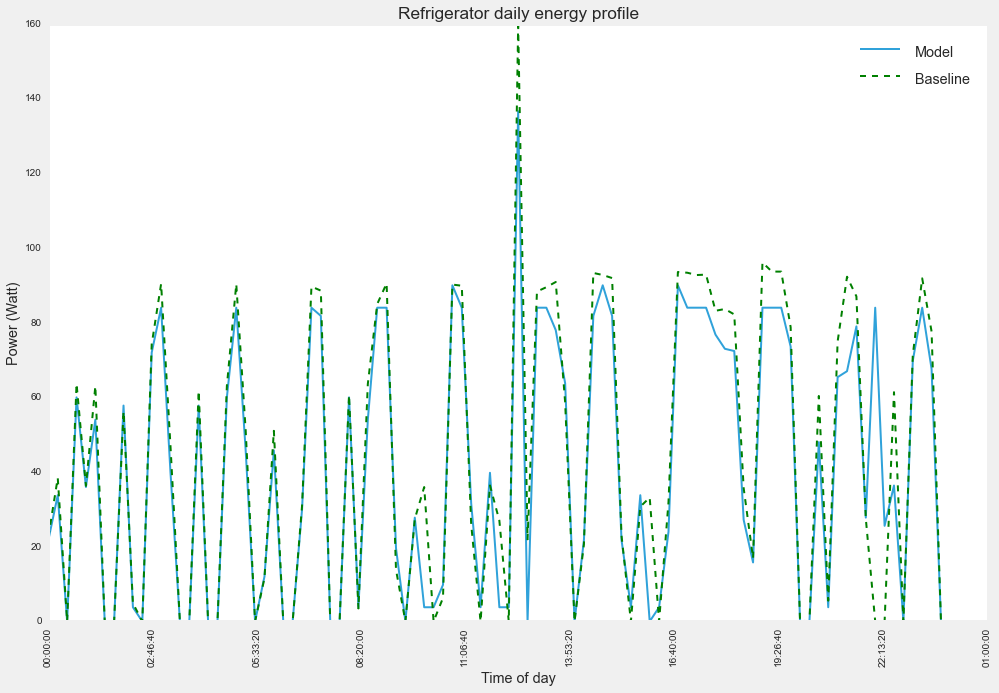

In [5]:
subset_pred = Min15_pred[['channel_12']]['2013-09-01']
subset_act = Min15_test[['channel_12']]['2013-09-01']
subset_pred['time'] = subset_pred.index.time

channel_12_pred = subset_pred[['channel_12']].values
channel_12_act = subset_act.values

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (15,10))
    plt.axes(axisbg = 'white')
    plt.xticks(rotation='vertical')
    plt.plot(subset_pred['time'],channel_12_pred, linewidth = 2,  label = 'Model')
    plt.plot(subset_pred['time'], channel_12_act, '--', color = 'g', linewidth = 2, label = 'Baseline')
    plt.ylabel('Power (Watt)',{'fontsize': 'x-large', 'rotation':'vertical'})
    plt.xlabel('Time of day',{'fontsize': 'x-large'})
    plt.title('Refrigerator daily energy profile', fontdict = {'fontsize' :'xx-large'})
    plt.grid(b=False)
    plt.legend(loc = 1, fontsize = 'x-large');

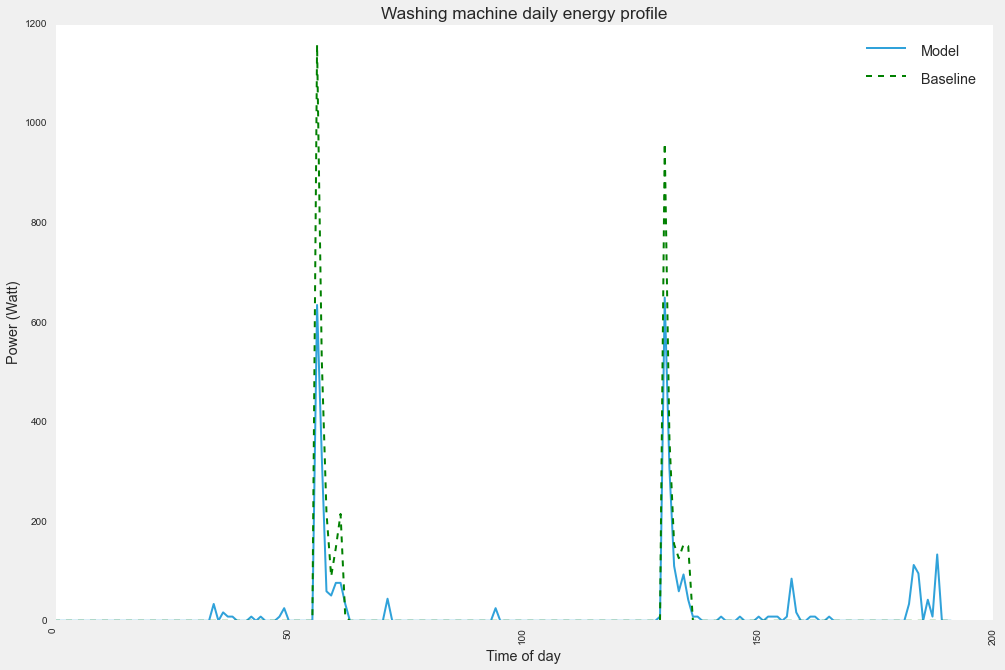

In [6]:
subset_pred = Min15_pred[['channel_5']]['2013-09-03':'2013-09-04']
subset_act = Min15_test[['channel_5']]['2013-09-03':'2013-09-04']
subset_pred['time'] = subset_pred.index.time

channel_12_pred = subset_pred[['channel_5']].values
channel_12_act = subset_act.values

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (15,10))
    plt.axes(axisbg = 'white')
    plt.xticks(rotation='vertical')
    plt.plot(channel_12_pred, linewidth = 2,  label = 'Model')
    plt.plot(channel_12_act, '--', color = 'g', linewidth = 2, label = 'Baseline')
    plt.ylabel('Power (Watt)',{'fontsize': 'x-large', 'rotation':'vertical'})
    plt.xlabel('Time of day',{'fontsize': 'x-large'})
    plt.title('Washing machine daily energy profile', fontdict = {'fontsize' :'xx-large'})
    plt.grid(b=False)
    plt.legend(loc = 1, fontsize = 'x-large');

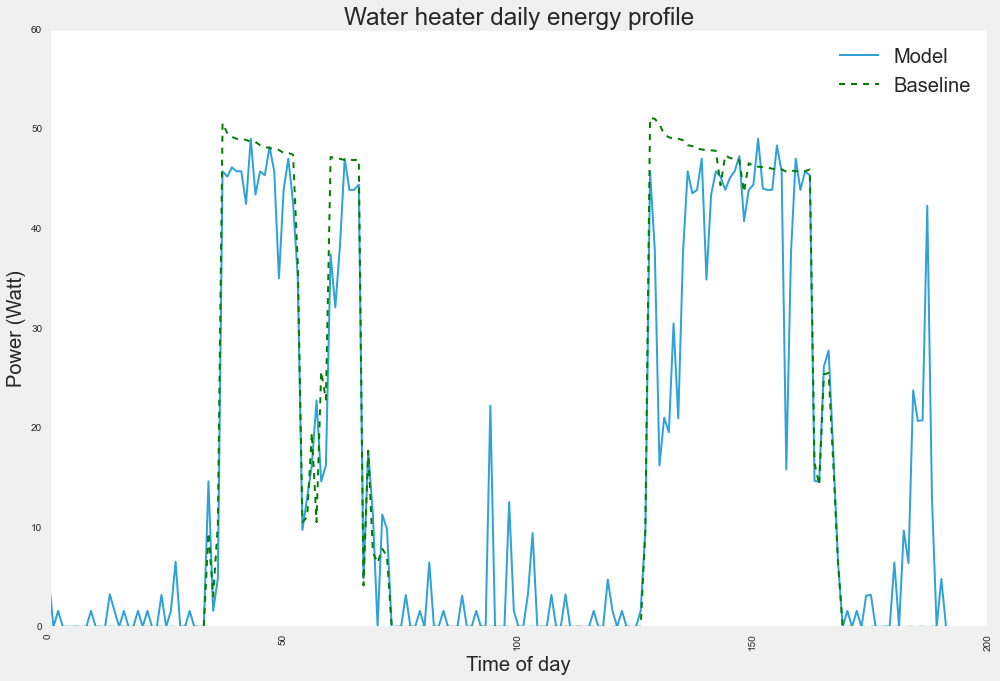

In [74]:
subset_pred = Min15_pred[['channel_3']]['2013-09-03':'2013-09-04']
subset_act = Min15_test[['channel_3']]['2013-09-03':'2013-09-04']
subset_pred['time'] = subset_pred.index.time

channel_12_pred = subset_pred[['channel_3']].values
channel_12_act = subset_act.values

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (15,10))
    plt.axes(axisbg = 'white')
    plt.xticks(rotation='vertical')
    plt.plot(channel_12_pred, linewidth = 2,  label = 'Model')
    plt.plot(channel_12_act, '--', color = 'g', linewidth = 2, label = 'Baseline')
    plt.ylabel('Power (Watt)',{'fontsize': 'x-large', 'rotation':'vertical'})
    plt.xlabel('Time of day',{'fontsize': 'x-large'})
    plt.title('Water heater daily energy profile', fontdict = {'fontsize' :'xx-large'})
    plt.grid(b=False)
    plt.legend(loc = 1, fontsize = 'x-large');

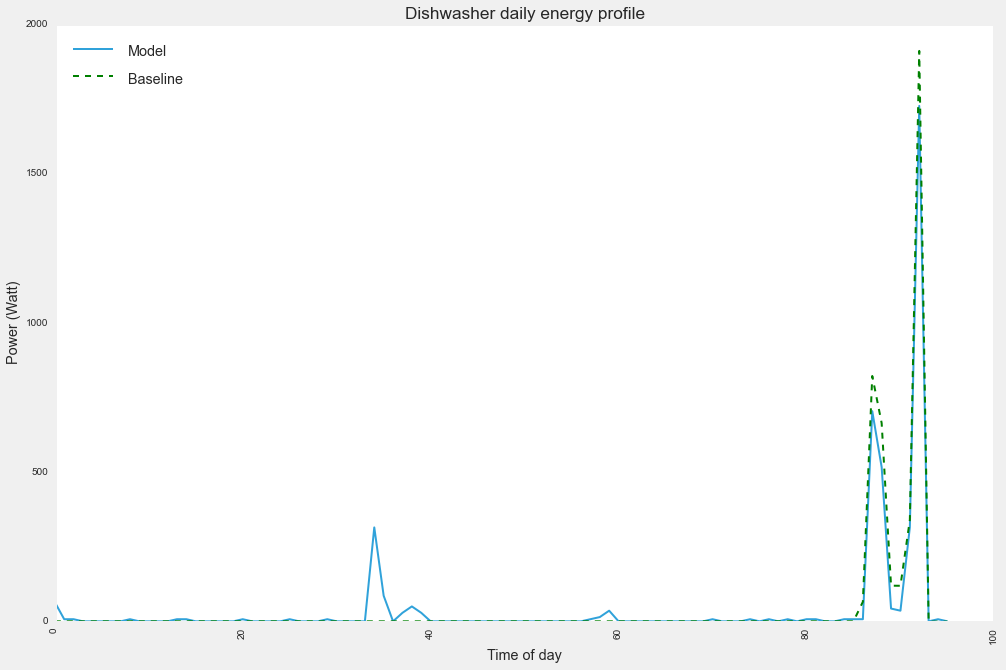

In [8]:
# channel = 'channel_6'
# channel_pred = Min15_pred[channel]['2013-09-04 00:00:00':'2013-09-04 23:59:59']
# idx = channel_pred.index
# channel_act = Min15_test.loc[idx][[channel]]

# plt.figure(figsize = (15,10))
# ax = channel_pred.plot(label = 'predicted',color = 'red')
# channel_act.plot(ax = ax, label = 'observed')
# plt.legend(title = channel);

subset_pred = Min15_pred[['channel_6']]['2013-09-04 00:00:00':'2013-09-04 23:59:59']
subset_act = Min15_test[['channel_6']]['2013-09-04 00:00:00':'2013-09-04 23:59:59']
subset_pred['time'] = subset_pred.index.time

channel_12_pred = subset_pred[['channel_6']].values
channel_12_act = subset_act.values

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (15,10))
    plt.axes(axisbg = 'white')
    plt.xticks(rotation='vertical')
    plt.plot(channel_12_pred, linewidth = 2,  label = 'Model')
    plt.plot(channel_12_act, '--', color = 'g', linewidth = 2, label = 'Baseline')
    plt.ylabel('Power (Watt)',{'fontsize': 'x-large', 'rotation':'vertical'})
    plt.xlabel('Time of day',{'fontsize': 'x-large'})
    plt.title('Dishwasher daily energy profile', fontdict = {'fontsize' :'xx-large'})
    plt.grid(b=False)
    plt.legend(loc = 2, fontsize = 'x-large');

In [42]:
start = '2013-09-07'
end = '2013-09-10'
hourly_samples = test.resample('120Min').mean()[start:end]
hourly_pred = predictions.resample('120Min').mean()[start:end]
hourly_samples['hour'] = hourly_samples.index.hour
hourly_samples['day'] = hourly_samples.index.date
hourly_samples.head()
xlabels = hourly_samples['day'].values

/Users/nelly/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


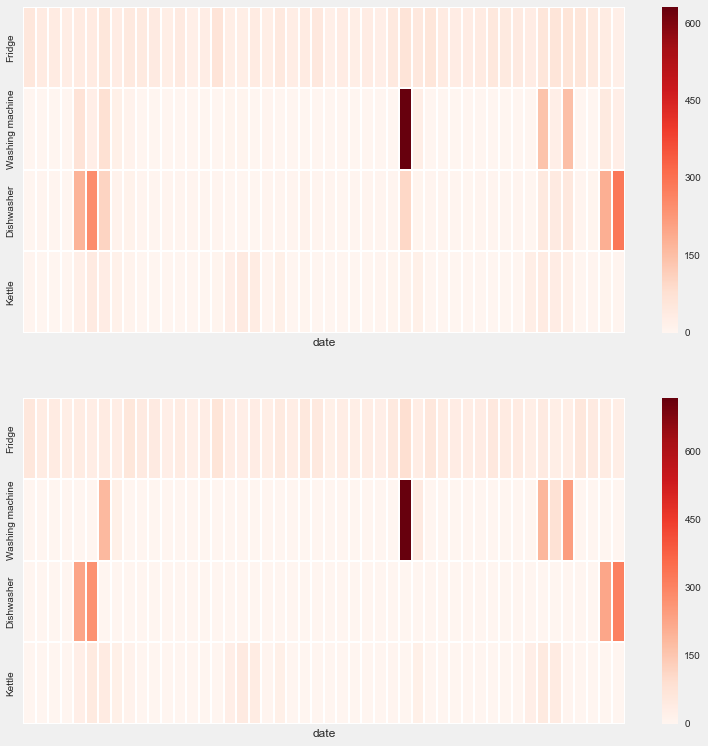

In [10]:
df_list = [hourly_pred,hourly_samples]
with plt.style.context('fivethirtyeight'):
    f, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(12, 12))
    for axis,df in zip(axes,df_list):
        sns.heatmap(df[['channel_12','channel_5','channel_6','channel_3']].T, xticklabels = False,
                    yticklabels = ['Fridge','Washing machine','Dishwasher','Kettle'], 
                    ax = axis,cmap="Reds", linewidths=.5)
    

/Users/nelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


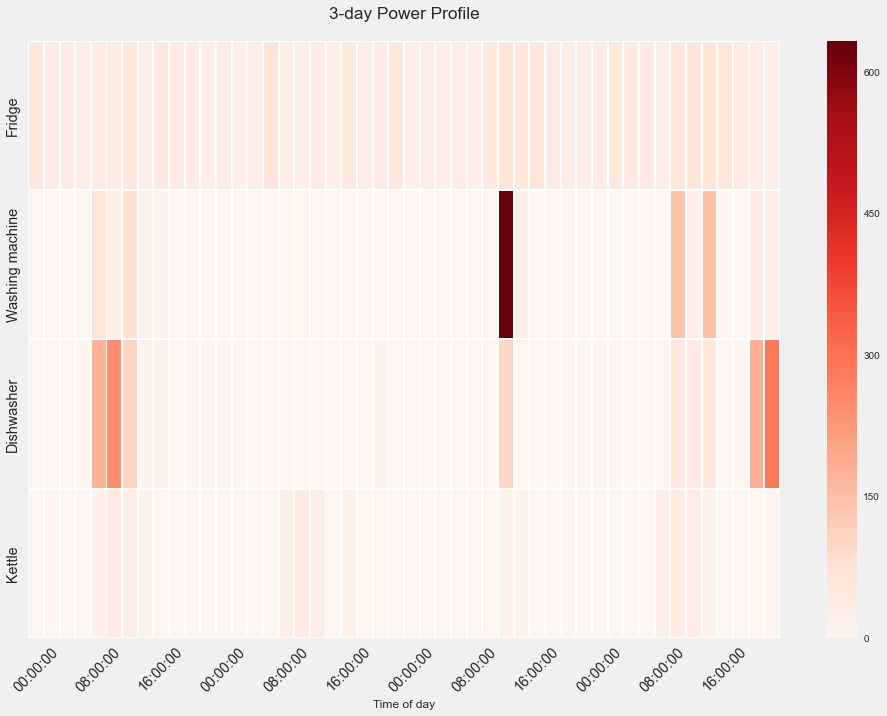

In [28]:
plot_data = hourly_pred[['channel_12','channel_5','channel_6','channel_3']]
# plot_data['day'] = plot_data.index.date
plot_data['Time of day'] = plot_data.index.time
plot_data = plot_data.reset_index().set_index(['Time of day']).drop('date',axis =1)

with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize = (15,10))
    plt.title('3-day Power Profile \n', fontdict = {'fontsize' :'xx-large'})
    plt.xticks(fontsize ='x-large',rotation=45)
    plt.yticks(fontsize ='x-large', rotation = 90)
    ax = sns.heatmap(plot_data.T, xticklabels = 4, 
                        yticklabels = ['Fridge','Washing machine','Dishwasher','Kettle'], 
                        cmap="Reds", linewidths=.5);

/Users/nelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


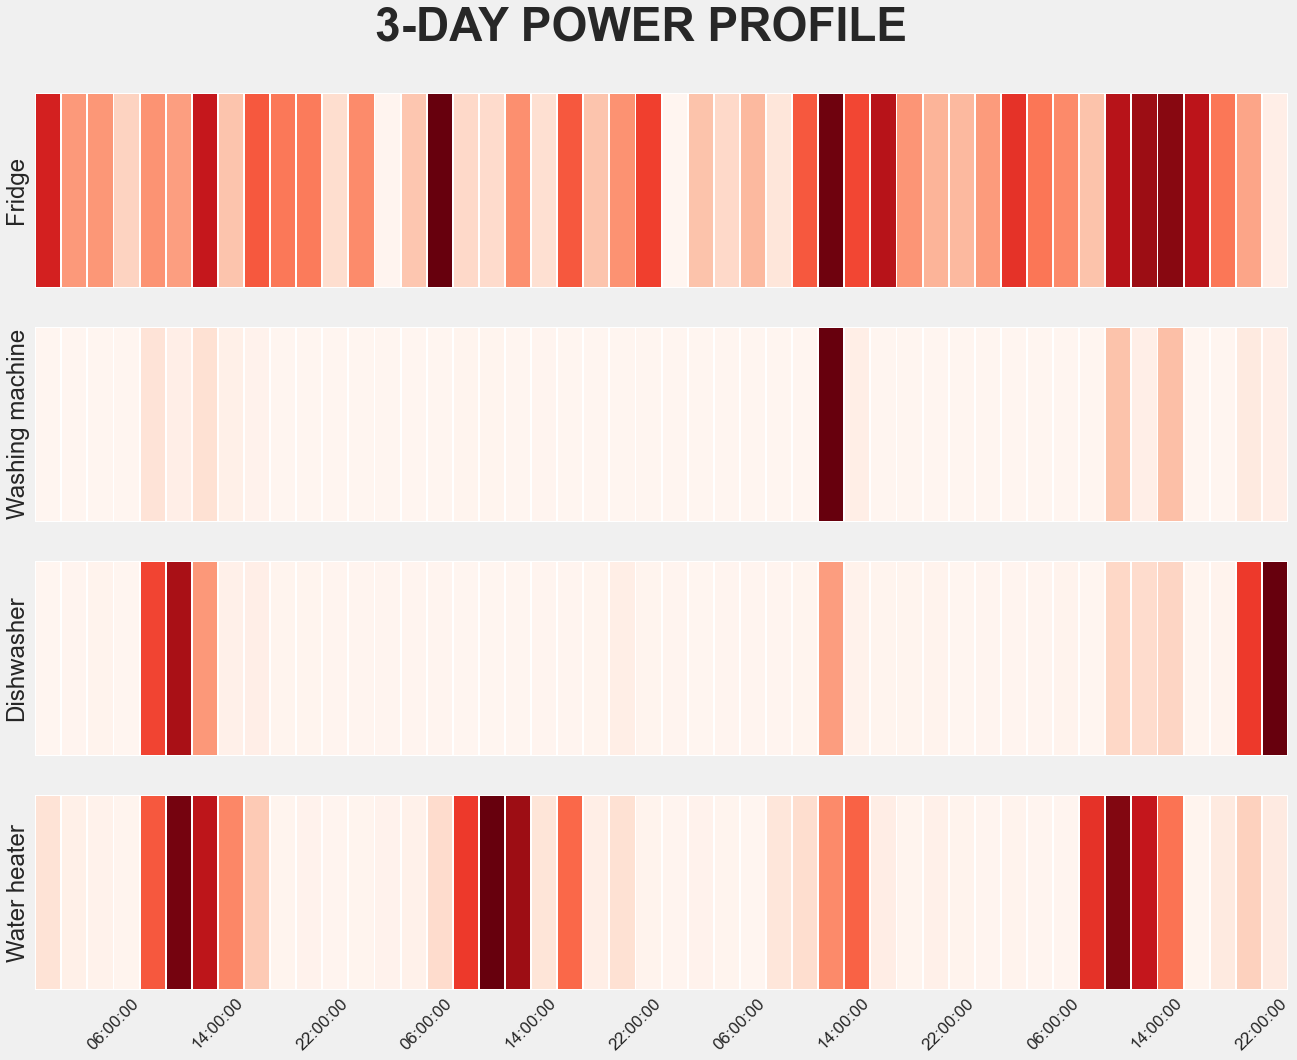

In [73]:
plot_data = hourly_pred[['channel_12','channel_5','channel_6','channel_3']]
# plot_data['day'] = plot_data.index.date
plot_data['Time of day'] = plot_data.index.time
plot_data = plot_data.reset_index().set_index(['Time of day']).drop('date',axis =1)

channels = ['channel_12','channel_5','channel_6','channel_3']
ylabels = ['Fridge','Washing machine','Dishwasher','Water heater']
xticks = [y if x%4 == 0 else "" for x,y in zip(range(1,len(plot_data.index.values)+1),plot_data.index.values)]

with plt.style.context('fivethirtyeight'):
    f, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(20, 15))
    for axis,channel,ylabel in zip(axes,channels,ylabels):
        sns.heatmap(plot_data[[channel]].T.values, xticklabels = 4,yticklabels = False,
                    ax = axis,cmap="Reds", linewidths=.5, cbar = False)
        axis.set_ylabel(ylabel, fontsize =24, rotation = 90)
#         xlabel = axis.get_xticklabels()[0]
#         xlabel.set_visible(False)
        
    plt.yticks(fontsize =26, rotation = 90)
    f.suptitle('3-DAY POWER PROFILE', fontsize = 46, weight = 'bold')
    plt.xticks(range(len(xticks)),xticks,fontsize ='large',rotation=45)


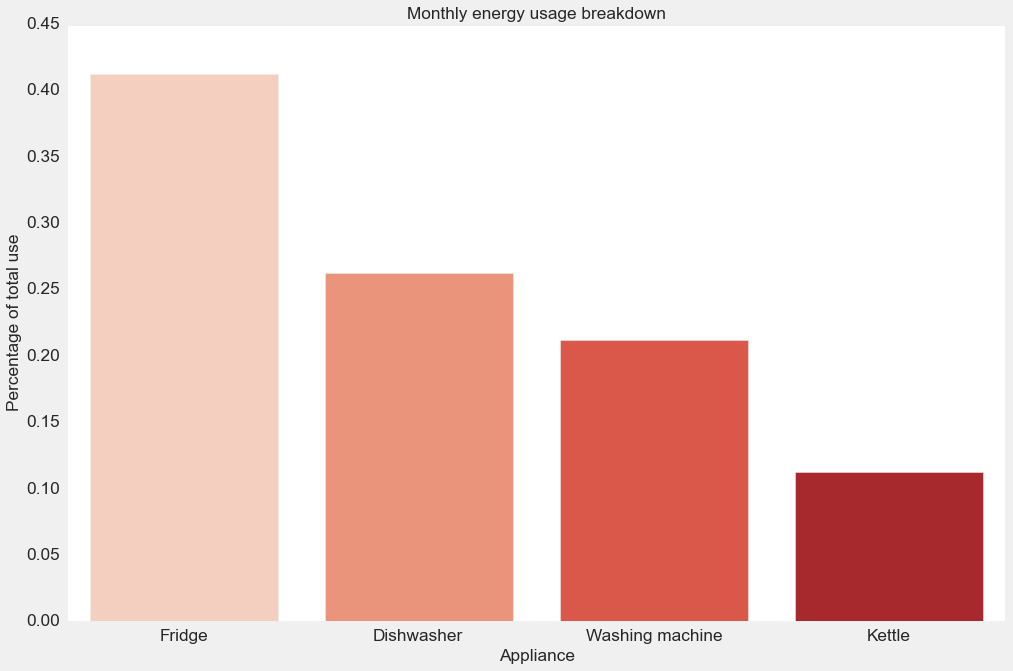

In [15]:
idx = np.argsort(predictions.sum().values)[::-1]
values = predictions.sum().values
y = [values[i] for i in idx]/np.sum(values)
columns = ['Fridge','Kettle','Washing machine','Dishwasher']
x = [columns[i] for i in idx]

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (15,10))
    plt.axes(axisbg = 'white')
    sns.barplot(x,y,palette = "Reds")
    plt.xticks(fontsize ='xx-large')
    plt.yticks(fontsize ='xx-large')
    plt.ylabel('Percentage of total use',{'fontsize': 'xx-large', 'rotation':'vertical'})
    plt.xlabel('Appliance',{'fontsize': 'xx-large'})
    plt.title('Monthly energy usage breakdown', fontdict = {'fontsize' :'xx-large'})
    plt.grid(b=False)
    plt.legend(loc = 1, fontsize = 'x-large');

In [5]:
predict_oct = pd.DataFrame()
predict_oct = fhmm.disaggregate(test_oct[['total']], predict_oct)
predict_oct_15Min = predict_oct.resample('15Min').mean()

predict_nov = pd.DataFrame()
predict_nov = fhmm.disaggregate(test_nov[['total']], predict_nov)
predict_nov_15Min = predict_nov.resample('15Min').mean()

predict_dec = pd.DataFrame()
predict_dec = fhmm.disaggregate(test_dec[['total']], predict_dec)
predict_dec_15Min = predict_dec.resample('15Min').mean()

Disaggregated 1 day(s) of data
Disaggregated 2 day(s) of data
Disaggregated 3 day(s) of data
Disaggregated 4 day(s) of data
Disaggregated 5 day(s) of data
Disaggregated 6 day(s) of data
Disaggregated 7 day(s) of data
Disaggregated 8 day(s) of data
Disaggregated 9 day(s) of data
Disaggregated 10 day(s) of data
Disaggregated 11 day(s) of data
Disaggregated 12 day(s) of data
Disaggregated 13 day(s) of data
Disaggregated 14 day(s) of data
Disaggregated 15 day(s) of data
Disaggregated 16 day(s) of data
Disaggregated 17 day(s) of data
Disaggregated 18 day(s) of data
Disaggregated 19 day(s) of data
Disaggregated 20 day(s) of data
Disaggregated 21 day(s) of data
Disaggregated 22 day(s) of data
Disaggregated 23 day(s) of data
Disaggregated 24 day(s) of data
Disaggregated 25 day(s) of data
Disaggregated 26 day(s) of data
Disaggregated 27 day(s) of data
Disaggregated 28 day(s) of data
Disaggregated 29 day(s) of data
Disaggregated 30 day(s) of data
Disaggregated 1 day(s) of data
Disaggregated 2 da

In [7]:
predict_oct.head()

,channel_12,channel_3,channel_5,channel_6
date,,,,
2013-10-01 00:00:00,0.0,0.0,0.0,1.0
2013-10-01 00:01:00,0.0,0.0,0.0,1.0
2013-10-01 00:02:00,0.0,0.0,0.0,1.0
2013-10-01 00:03:00,0.0,0.0,0.0,1.0
2013-10-01 00:04:00,0.0,0.0,0.0,1.0


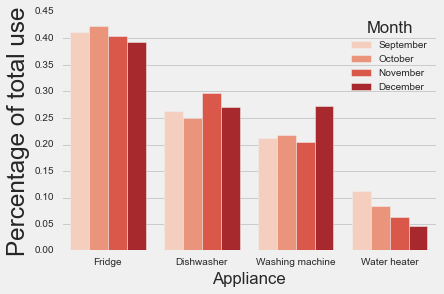

In [72]:
idx = np.argsort(predictions.sum().values)[::-1]

v_sep = predictions.sum().values
v_oct = predict_oct.sum().values
v_nov = predict_nov.sum().values
v_dec = predict_dec.sum().values

y_sep = [v_sep[i] for i in idx]/np.sum(v_sep)
y_oct = [v_oct[i] for i in idx]/np.sum(v_sep)
y_nov = [v_nov[i] for i in idx]/np.sum(v_sep)
y_dec = [v_dec[i] for i in idx]/np.sum(v_sep)

data = np.array([y_sep,y_oct,y_nov,y_dec])
columns = ['Fridge','Water heater','Washing machine','Dishwasher']
x = [columns[i] for i in idx]

d1 = {'Percentage of total use':y_sep, 'Appliance':x,'Month':'September'}
d2 = {'Percentage of total use':y_oct, 'Appliance':x,'Month':'October'}
d3 = {'Percentage of total use':y_nov, 'Appliance':x,'Month':'November'}
d4 = {'Percentage of total use':y_dec, 'Appliance':x,'Month':'December'}

df = pd.DataFrame(data = d1)
df = df.append(pd.DataFrame(data = d2))
df = df.append(pd.DataFrame(data = d3))
df = df.append(pd.DataFrame(data = d4))


with plt.style.context('fivethirtyeight'):
#     plt.figure(figsize = (15,10))
#     plt.axes(axisbg = 'white')
#     sns.barplot(x,y,palette = "Reds")
    sns.barplot(x="Appliance", y="Percentage of total use", hue="Month", data=df,palette = "Reds")
#     plt.xticks(fontsize ='xx-large')
#     plt.yticks(fontsize ='xx-large')
    plt.ylabel('Percentage of total use',{'fontsize': 'xx-large', 'rotation':'vertical'})
#     plt.xlabel('Appliance',{'fontsize': 'xx-large'})
#     plt.title('Monthly energy usage breakdown', fontdict = {'fontsize' :'xx-large'})
#     plt.grid(b=False)
#     plt.legend(loc = 1, fontsize = 'x-large');